In [1]:
!curl -s https://course.fast.ai/setup/colab | bash
!pip install tensorflow-gpu
#That was for updating fastai
from fastai.vision import *
import numpy as np


Updating fastai...
Done.
     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 3.9MB 40.0MB/s 
     |████████████████████████████████| 450kB 64.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


Now we have to collect the data 

In [2]:
!git clone https://github.com/DeepSmeag/b99classifier_data.git

Cloning into 'B99Classifier'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 159 (delta 79), reused 158 (delta 78), pack-reused 0
Receiving objects: 100% (159/159), 2.29 MiB | 1.62 MiB/s, done.
Resolving deltas: 100% (79/79), done.


We can now load the data then train the model

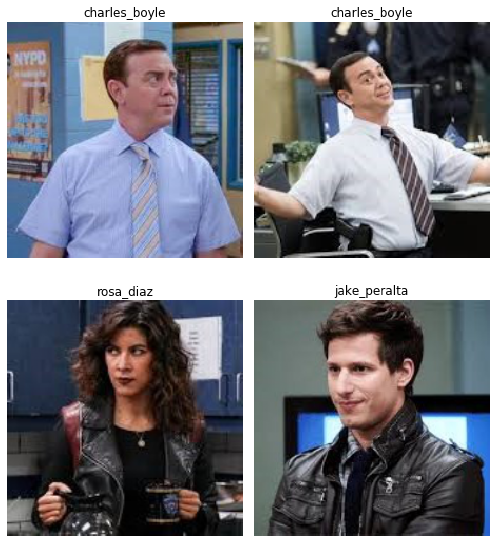

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(
    'b99images/',
    train='.',
    valid_pct=0.25,
    size=224,
    num_workers=4,
    bs=8
).normalize(imagenet_stats)

data.show_batch(rows=2, figsize=(7, 8))


In [5]:
learn = cnn_learner(
    data,
    models.resnet101,
    metrics = error_rate
)
x= 15
learn.fit_one_cycle(x)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.077855,1.497553,0.655172,00:04
1,1.284547,1.346545,0.344828,00:02
2,0.921266,1.613504,0.310345,00:02
3,0.685169,2.819853,0.344828,00:02
4,0.531361,3.219533,0.344828,00:02
5,0.467277,2.564835,0.379310,00:02
6,0.415832,3.767216,0.413793,00:02
7,0.352782,2.801757,0.344828,00:02
8,0.341441,2.336923,0.310345,00:02
9,0.296039,3.140683,0.344828,00:02


After training let's see how it does

In [7]:
interp = ClassificationInterpretation.from_learner(learn)

This builds a confusion matrix that shows in numbers where the model confuses characters

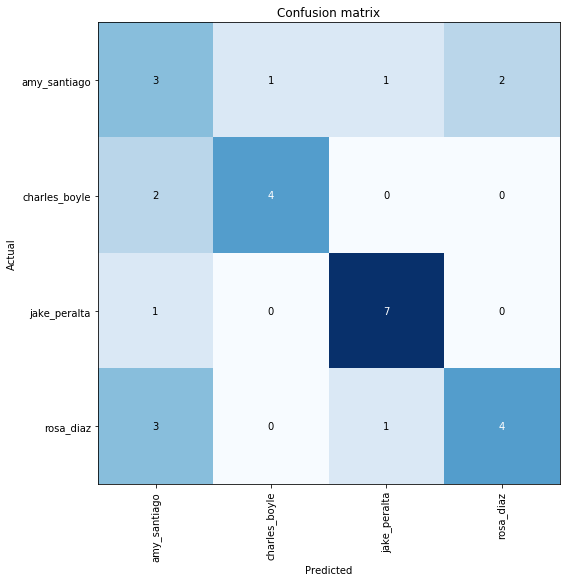

In [8]:
interp.plot_confusion_matrix(figsize=(8, 8))

This shows the top mistakes

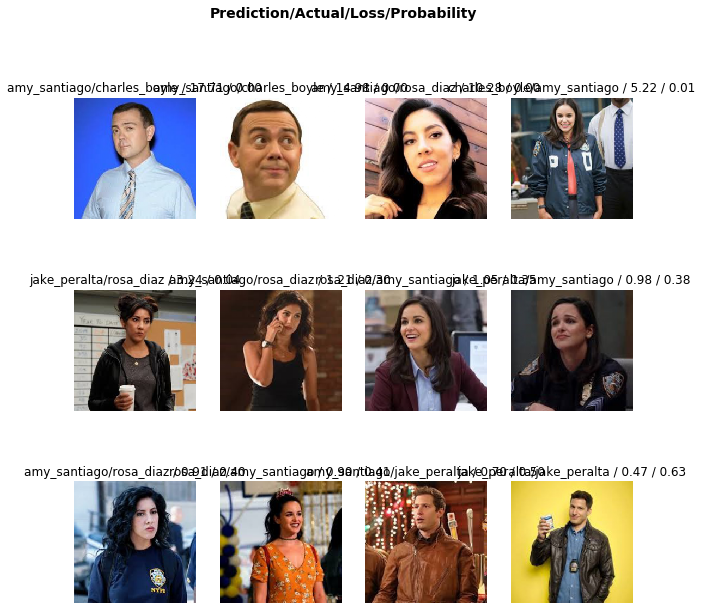

In [9]:
interp.plot_top_losses(12,figsize=(10,10))